# 特征理解：数据集中有什么

本章内容：

- 结构化数据与非结构化数据
- 定量与定性数据
- 数据的4个等级
- 探索性数据分析和数据可视化
- 描述性统计

## 2.1 结构化数据与非结构化数据

拿到新的数据集后，首先要确认数据是结构化的还是非结构化的。

- **结构化数据**：即由行（实例）和列（属性或特征）组成的表格形式的数据，通常来自数据库或电子表格。
- **非结构化数据**：没有标准的组织结构，自由流动。如文本日志、图像、视频和声音等。

### 非结构化数据的例子：系统日志

In [1]:
!head -n 10 /var/log/dpkg.log

2020-04-23 11:06:40 startup archives install
2020-04-23 11:06:40 install base-passwd:amd64 <none> 3.5.47
2020-04-23 11:06:40 status half-installed base-passwd:amd64 3.5.47
2020-04-23 11:06:40 status unpacked base-passwd:amd64 3.5.47
2020-04-23 11:06:40 configure base-passwd:amd64 3.5.47 3.5.47
2020-04-23 11:06:40 status half-configured base-passwd:amd64 3.5.47
2020-04-23 11:06:40 status installed base-passwd:amd64 3.5.47
2020-04-23 11:06:40 startup archives install
2020-04-23 11:06:40 install base-files:amd64 <none> 11ubuntu5
2020-04-23 11:06:40 status half-installed base-files:amd64 11ubuntu5


In [2]:
import pandas as pd
logs = pd.read_table('/var/log/dpkg.log', header=None, names=['info'])
logs.head()

,info
0,2020-04-23 11:06:40 startup archives install
1,2020-04-23 11:06:40 install base-passwd:amd64 ...
2,2020-04-23 11:06:40 status half-installed base...
3,2020-04-23 11:06:40 status unpacked base-passw...
4,2020-04-23 11:06:40 configure base-passwd:amd6...


可见，上述表中每行代表一篇日志，而且只有一列：日志文本。这个文本并不是特征，只是来自服务器的原始日志。通常，文本形式的数据都是非结构化的。不过，大部分非结构化数据可以通过一些方法转换为结构化数据。

## 2.2 定量和定性数据

在处理结构化的表格数据时，第一个问题是：数据是定量的还是定性的？

- **定量数据** 本质上是数值，用来衡量某个事物的数量，如温度、体重等。
- **定性数据** 本质上是类别，用来描述某个事物的性质，如天气、性别等。

有时，数据可以同时是定量和定性的。如餐厅的评分（1～5星），虽然是数值，但也可以代表类别。

下面通过一个数据集，作为掌握定量和定性数据的例子。

### 按工作级别的工资

先导入用到的包：

In [1]:
# 导入探索性数据分析所需的包

# 表格数据分析包
import pandas as pd
# 数学计算包
import numpy as np
# 数据可视化包
import matplotlib.pyplot as plt
# 增强的数据可视化包
import seaborn as sns
# 使用数据可视化主题
plt.style.use('fivethirtyeight')

然后导入数据集，探索在旧金山做不同工作的工资，此数据集为kaggle开发数据，可自由使用：

In [4]:
!ls ./sample_data

2013-sfo-customer-survey.csv
DataDictionary_2013-SFO-Customer-Survey.pdf
GlobalLandTemperaturesByCity.csv
GlobalLandTemperaturesByCity.csv.zip
salary-ranges-by-job-classification.csv


In [100]:
salary_ranges = pd.read_csv('sample_data/salary-ranges-by-job-classification.csv')
salary_ranges.head()

,SetID,Job Code,Eff Date,Sal End Date,Salary SetID,Sal Plan,Grade,Step,Biweekly High Rate,Biweekly Low Rate,Union Code,Extended Step,Pay Type
0,COMMN,0109,2009-07-01T00:00:00,2010-06-30T00:00:00,COMMN,SFM,00000,1,0.0,0.0,330,0,C
1,COMMN,0110,2009-07-01T00:00:00,2010-06-30T00:00:00,COMMN,SFM,00000,1,15.0,15.0,323,0,D
2,COMMN,0111,2009-07-01T00:00:00,2010-06-30T00:00:00,COMMN,SFM,00000,1,25.0,25.0,323,0,D
3,COMMN,0112,2009-07-01T00:00:00,2010-06-30T00:00:00,COMMN,SFM,00000,1,50.0,50.0,323,0,D
4,COMMN,0114,2009-07-01T00:00:00,2010-06-30T00:00:00,COMMN,SFM,00000,1,100.0,100.0,323,0,M


可见，表格有很多列，能够看出有些是定性的，有些是定量的。可以用pd.info()方法具体了解一下：

In [101]:
salary_ranges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SetID               1356 non-null   object 
 1   Job Code            1356 non-null   object 
 2   Eff Date            1356 non-null   object 
 3   Sal End Date        1356 non-null   object 
 4   Salary SetID        1356 non-null   object 
 5   Sal Plan            1356 non-null   object 
 6   Grade               1356 non-null   object 
 7   Step                1356 non-null   int64  
 8   Biweekly High Rate  1356 non-null   float64
 9   Biweekly Low Rate   1356 non-null   float64
 10  Union Code          1356 non-null   int64  
 11  Extended Step       1356 non-null   int64  
 12  Pay Type            1356 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 137.8+ KB


查看一些有多少缺失值(null)：

In [102]:
salary_ranges.isnull().sum()

SetID                 0
Job Code              0
Eff Date              0
Sal End Date          0
Salary SetID          0
Sal Plan              0
Grade                 0
Step                  0
Biweekly High Rate    0
Biweekly Low Rate     0
Union Code            0
Extended Step         0
Pay Type              0
dtype: int64

没有缺失值！下面用pd.describe()方法查看一下定量数据的描述性统计：

In [103]:
salary_ranges.describe()

,Step,Biweekly High Rate,Biweekly Low Rate,Union Code,Extended Step
count,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000
mean,1.294985,3161.727021,3754.652006,392.676991,0.150442
std,1.045816,1481.002904,1605.157054,338.100562,1.006734
min,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,2145.000000,2607.000000,21.000000,0.000000
50%,1.000000,2856.500000,3465.000000,351.000000,0.000000
75%,1.000000,3703.000000,4484.000000,790.000000,0.000000
max,5.000000,12120.770000,12120.770000,990.000000,11.000000


Pandas认为此数据集中上述5列是定量的，但工会代码(Union Code）显然不应该定量的。因此需要做一些工作来理解某些特征。最值得注意的特征是一个定量列Biweekly High Rate(双周最高工资）和一个定性列Grade（工作等级）。

In [104]:
salary_ranges = salary_ranges[['Biweekly High Rate', 'Grade']]
salary_ranges.head()

,Biweekly High Rate,Grade
0,0.0,00000
1,15.0,00000
2,25.0,00000
3,50.0,00000
4,100.0,00000


当处理定量数据时，一般使用整数或浮点数；定性数据则一般使用字符串或Unicode对象。

In [105]:
salary_ranges['Biweekly High Rate'].describe()

count     1356.000000
mean      3161.727021
std       1481.002904
min          0.000000
25%       2145.000000
50%       2856.500000
75%       3703.000000
max      12120.770000
Name: Biweekly High Rate, dtype: float64

Biweekly High Rate列中的数据已经为浮点数，无需转换。

In [11]:
salary_ranges['Grade'].describe()

count      1356
unique      688
top       00000
freq         61
Name: Grade, dtype: object

将Grade列中的数据转换为字符串：

In [12]:
salary_ranges['Grade'] = salary_ranges['Grade'].astype(str)
salary_ranges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Biweekly High Rate  1356 non-null   float64
 1   Grade               1356 non-null   object 
dtypes: float64(1), object(1)
memory usage: 21.3+ KB


总结一下：

- 双周最高工资（Biweekly High Rate）：定量列，代表每两周的工资
- 工作等级（Grade）：定性列，代表等级，而非数量。

## 2.3 数据的4个等级

数据除了分为**定量**和**定性**，也可以分为4个等级：

- 定类等级（nominal level）
- 定序等级（ordinal level）
- 定距等级（interval level）
- 定比等级（ratio level）

### 定类等级

定类等级是数据的第一个等级，此等级的数据只按名称分类。如血型（A，B、O和AB）、物种和人名等定性数据。在这个等级上，不能执行任何定量数据操作，如加减乘除等。但定类等级的数据是可以**计数**的：

In [13]:
salary_ranges['Grade'].value_counts().head()

00000    61
07450    12
07420     9
07170     9
06870     9
Name: Grade, dtype: int64

可见，出现最多的工作等级是00000，说明这个工作等级是**众数**，即最多的等级（类别）。既然可以计数，所以可以绘制图表（如条形图）。

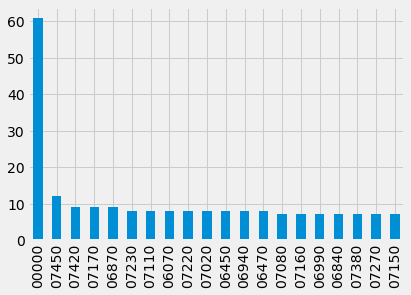

In [14]:
grade_counts = salary_ranges['Grade'].value_counts()
grade_counts = grade_counts.sort_values(ascending=False)
grade_counts.head(20).plot(kind='bar')
plt.show()

在定类等级上，也可以绘制饼图：

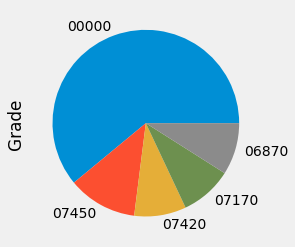

In [15]:
grade_counts.head(5).plot(kind='pie')
plt.show()

### 定序等级

**定序等级**在定类等级的基础上，具有以下附加属性：

- 定序等级的数据可以**自然排序**
- 定序等级的数据可以**比较大小**

可见，定序等级除了可以像定类等级进行**计数**，还可以**比较**和**排序**。如非分数考试成绩（A、B、C、D、F）。这就说明定序等级的数据不仅可以绘制**条形图**和**饼图**，而且因为能排序和比较，所以能计算中位数和百分位数，从而可以绘制**茎叶图**和**箱线图**。为了解释定序等级，这里引入一个新的数据集：2013旧金山国际机场客户调查表（2013_SFO_Customer_survey）

In [16]:
!ls sample_data

2013-sfo-customer-survey.csv
DataDictionary_2013-SFO-Customer-Survey.pdf
GlobalLandTemperaturesByCity.csv
GlobalLandTemperaturesByCity.csv.zip
salary-ranges-by-job-classification.csv


In [106]:
customer_survey = pd.read_csv('sample_data/2013-sfo-customer-survey.csv')
customer_survey.shape

(3535, 95)

该数据集有95列，关于该数据集的说明，请[查看数据字典](sample_data/DataDictionary_2013-SFO-Customer-Survey.pdf)，其中Q7A_ART这一列是关于艺术品和展览的。其可能的取值有0、1、2、3、4、5、6，每个数字代表了客户评价等级（好坏）：

- 1: 不可接受（Unacceptable）
- 2: 低于平均（Below Average）
- 3: 平均（Average）
- 4: 不错（Good）
- 5: 特别好（Outstanding）
- 6: 从未使用或参观过（Have Never Used or Visited）
- 7: 空白（Blank）

In [18]:
art_ratings = customer_survey['Q7A_ART']
art_ratings.describe()

count    3535.000000
mean        4.300707
std         1.341445
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         6.000000
Name: Q7A_ART, dtype: float64

看来Pandas把该列当数值处理了，但我们知道，虽然这些值是数字，但每个数其实代表的是类别，因此是定性的，而且属于定序等级。除去0和6这两个类别，剩下的5个有序类别类似于评分：

In [19]:
art_ratings = art_ratings[(art_ratings>=1) & (art_ratings<=5)]
art_ratings = art_ratings.astype(str)
art_ratings.describe()

count     2656
unique       5
top          4
freq      1066
Name: Q7A_ART, dtype: object

现在定序数据的格式正确，可进行以下可视化：

- 绘制饼图

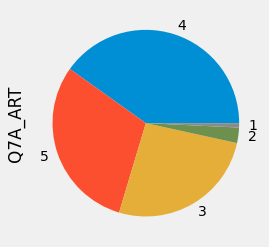

In [20]:
art_ratings.value_counts().plot(kind='pie')
plt.show()

- 绘制条形图

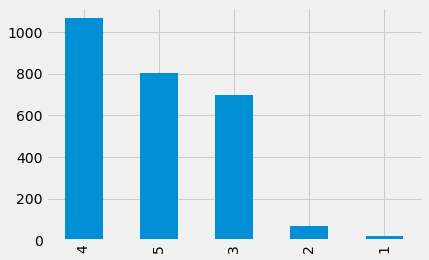

In [21]:
art_ratings.value_counts().plot(kind='bar')
plt.show()

- 绘制箱线图（定序等级）

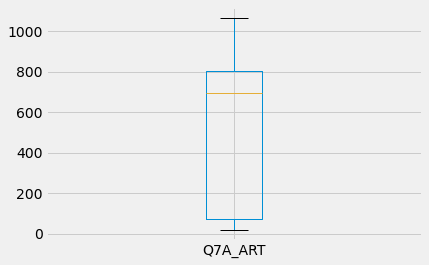

In [22]:
art_ratings.value_counts().plot(kind='box')
plt.show()

### 定距等级

在**定距等级**，数据首先是定量的，因此不仅可以像定序等级的数据一样排序，而且值之间的差异也有意义，即除了**排序**和**比较**，还可以**加减**。定距等级的经典例子是温度。由于定距等级上可以进行加减，计算**算术平均数（均值）** 和**标准差**便成为可能。为了说明问题，这里引入关于全球气候变化情况的数据集：GlobalLandTemperaturesByCountry。

In [79]:
!ls sample_data

2013-sfo-customer-survey.csv
DataDictionary_2013-SFO-Customer-Survey.pdf
GlobalLandTemperaturesByCountry.csv
GlobalLandTemperaturesByCountry.csv.zip
salary-ranges-by-job-classification.csv


In [80]:
temperatures = pd.read_csv('sample_data/GlobalLandTemperaturesByCountry.csv')
temperatures.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [82]:
temperatures.shape

(577462, 4)

此数据集有近58万行，每行代表某个城市某个月的平均气温，上溯到18世纪。只看前5行，可知此数据集有缺失值。先把缺失值删除：

In [83]:
temperatures.dropna(axis=0, inplace=True)
temperatures.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland


检查以下是否还有缺失值：

In [84]:
temperatures.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
dtype: int64

OK，没有缺失值。这里主要关注的是AverageTemperature（平均气温）列。温度数据属于定距等级，这里无法使用条形图或饼图进行可视化，因为值太多：

In [85]:
temperatures['AverageTemperature'].nunique()

52028

对52028个不同值绘条形图或饼图是没有意义的，因为温度值是定量的。对于定距等级的数据，最常用的图是**直方图**，以查看其分布情况：

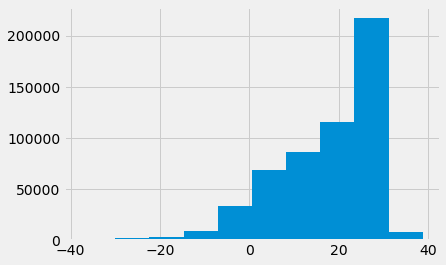

In [86]:
temperatures['AverageTemperature'].hist()
plt.show()

可见，平均温度约20度。确认一下：

In [87]:
temperatures['AverageTemperature'].describe()

count    544811.000000
mean         17.193354
std          10.953966
min         -37.658000
25%          10.025000
50%          20.901000
75%          25.814000
max          38.842000
Name: AverageTemperature, dtype: float64

mean = 17，差不多。继续处理数据，加入year和century两列，只观察中国的数据：

In [88]:
# 将dt列转换为日期，并取年份
temperatures['dt'] = pd.to_datetime(temperatures['dt'])
temperatures['year'] = temperatures['dt'].map(lambda v: v.year)
temperatures.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year
0,1743-11-01,4.384,2.294,Åland,1743
5,1744-04-01,1.530,4.680,Åland,1744
6,1744-05-01,6.702,1.789,Åland,1744
7,1744-06-01,11.609,1.577,Åland,1744
8,1744-07-01,15.342,1.410,Åland,1744


In [89]:
# 只看中国
temperatures = temperatures.loc[temperatures['Country'] == 'China']
# 年份转换为世纪
temperatures['century'] = temperatures['year'].map(lambda y: int(y/100+1))
temperatures.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year,century
110149,1820-08-01,16.684,1.978,China,1820,19
110150,1820-09-01,13.292,1.555,China,1820,19
110151,1820-10-01,5.624,1.383,China,1820,19
110152,1820-11-01,-1.981,1.340,China,1820,19
110153,1820-12-01,-8.551,1.508,China,1820,19


用新的century列，对每个世纪画直方图：

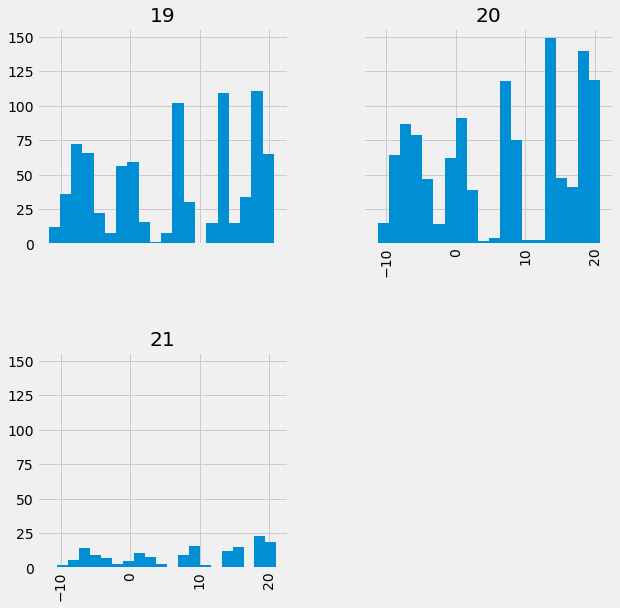

In [90]:
temperatures['AverageTemperature'].hist(by=temperatures['century'],
                                       sharex=True, sharey=True,
                                       figsize=(10, 10),
                                       bins=20)
plt.show()

从直方图似乎看不出平均气温随时间的变化，画趋势图（线图）看一下：

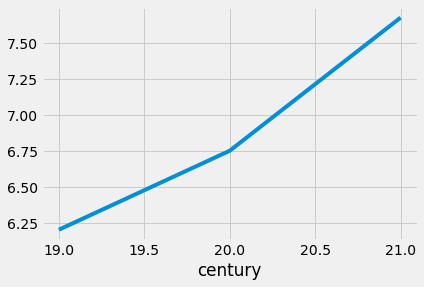

In [91]:
temperatures.groupby('century')['AverageTemperature'].mean().plot(kind='line')
plt.show()

因为定距等级下，差值是有意义的，因此可以计算中国从19世纪平均温度上升了多少度：

In [92]:
century_changes = temperatures.groupby('century')
century_changes = century_changes['AverageTemperature'].mean()
century_changes

century
19    6.204283
20    6.752283
21    7.676195
Name: AverageTemperature, dtype: float64

用21世纪的平均温度减去19世纪的，得到温差：

In [93]:
century_changes[21] - century_changes[19]

1.4719119678293549

定距及更高等级的好处是可以绘制散点图。在气候变化数据集中，year和AverageTemperature列都是定距等级，因为其差值是有意义的。

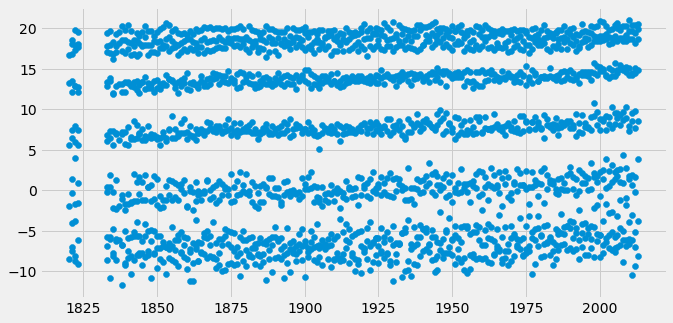

In [94]:
x = temperatures['year']
y = temperatures['AverageTemperature']

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x, y)
plt.show()

用groupby清除年份的大部分噪声:

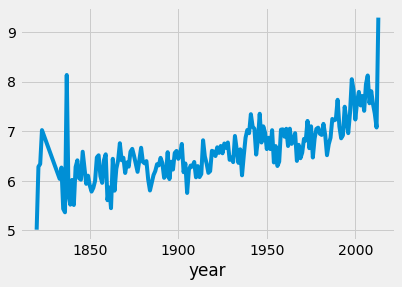

In [96]:
temperatures.groupby('year').mean()['AverageTemperature'].plot()
plt.show()

可以看出气温随年份整体上升的趋势，可以用滑动均值(rolling mean）平滑一下：

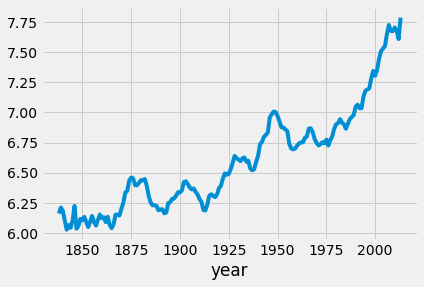

In [98]:
temperatures.groupby('year').mean()['AverageTemperature'].rolling(10).mean().plot()
plt.show()

这说明中国的平均气温总体的确有上升的趋势。

### 定比等级

定比等级为最高级，可进行最高程度的控制和数学运算。和定距等级一样，定比等级上的数据也是定量数据，除了**加减**，还可以进行**乘除**运算，如商品的价格、员工的工资等。

对于前面的工资数据集，其Biweekly High Rate列属于定比等级，因此可以进行新的观察。先看一下最高工资：

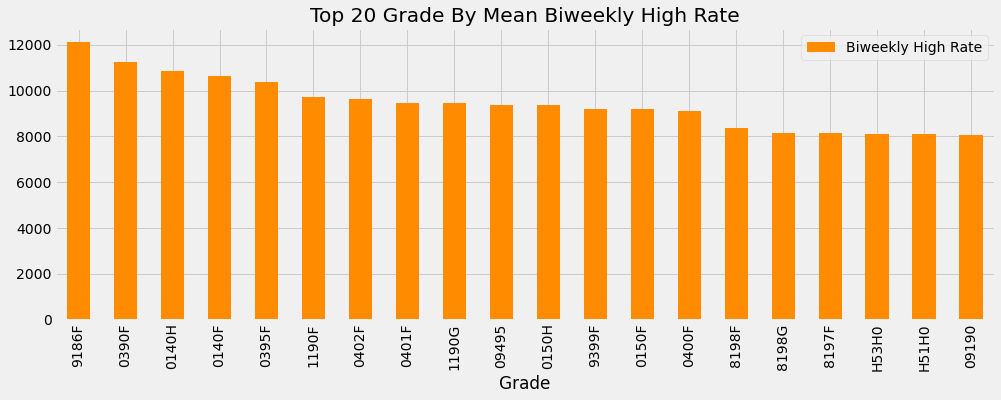

In [107]:
fig = plt.figure(figsize=(15, 5))
ax = fig.gca()

salary_ranges.groupby('Grade')[['Biweekly High Rate']].mean().sort_values(
'Biweekly High Rate', ascending=False).head(20).plot.bar(stacked=False, 
                                                         ax=ax,
                                                        color='darkorange')
ax.set_title('Top 20 Grade By Mean Biweekly High Rate')
plt.show()

可见，工资最高的是Grade=9186F的工作（公共交通部总经理）。同样，可以查看工资最低的工作：

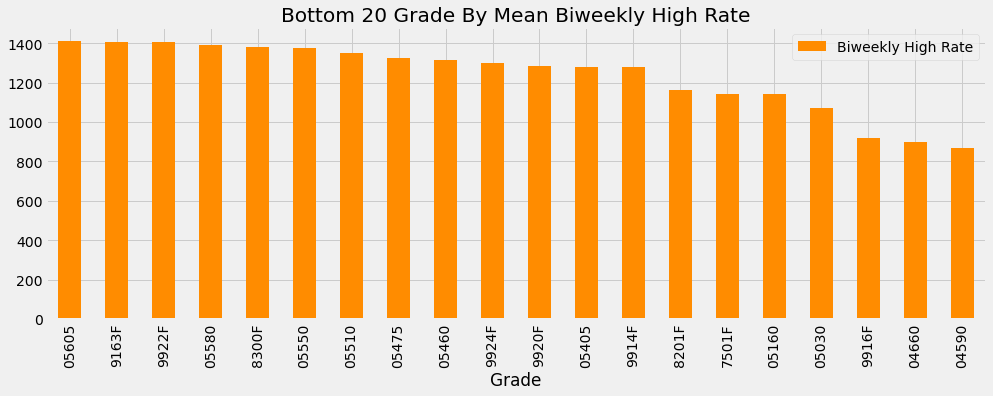

In [108]:
fig = plt.figure(figsize=(15, 5))
ax = fig.gca()

salary_ranges.groupby('Grade')[['Biweekly High Rate']].mean().sort_values(
'Biweekly High Rate', ascending=False).tail(20).plot.bar(stacked=False, 
                                                         ax=ax,
                                                        color='darkorange')
ax.set_title('Bottom 20 Grade By Mean Biweekly High Rate')
plt.show()

可以看出，工资最低的是Grade=04590的工作（集会助理）。因为工资属于定比等级，所以可以计算最高和最低工资的比值：

In [109]:
sorted_salary = salary_ranges.groupby('Grade')[['Biweekly High Rate']].mean().sort_values(
'Biweekly High Rate', ascending=False)

sorted_salary.iloc[0][0] / sorted_salary.iloc[-1][0]

13.931919540229886

可见，最高工资是最低工资的近14倍。

## 2.4 数据等级总结

理解数据的不同等级对于特征工程非常必要，当需要构建新特征或转换旧特征时，必须有办法确定如何处理每一列。

### 不同数据等级上的操作

#### 每个等级的可行于不可行操作

如下表所示：

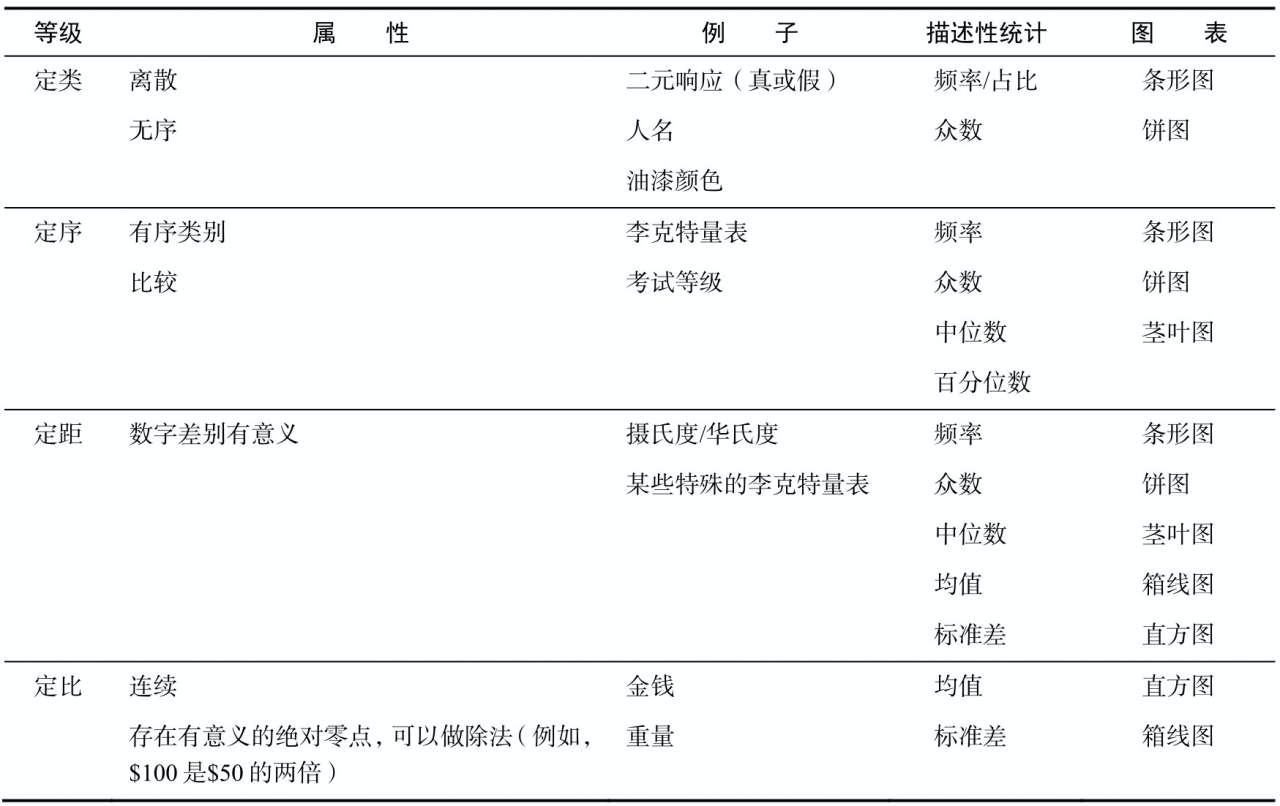

#### 每个等级上的可行与不可行统计类型

如下表所示：

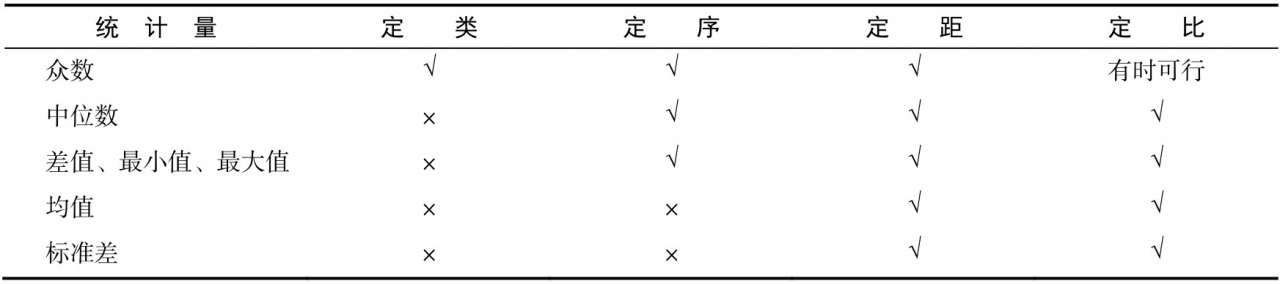

#### 每个等级上的可行与不可行的可视化

如下表所示：

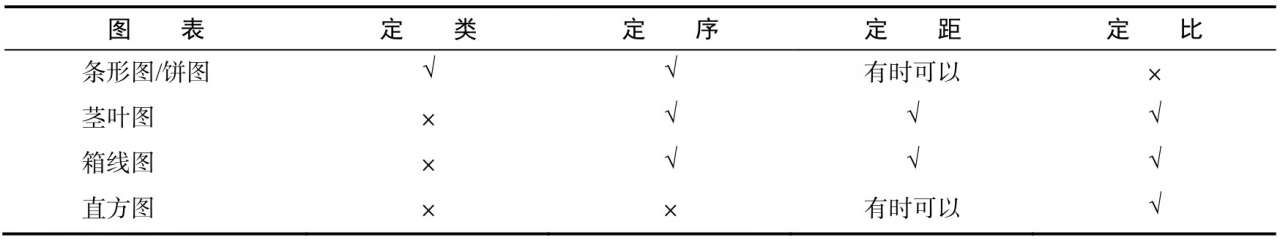

### 特征理解的基本流程

1. 数据是何种组织结构？ 结构化（表格）还是非结构化（文本）
2. 每列的数据是定量还是定性的？ 数字表示数值还是字符串？
3. 每列处于哪个等级？定类、定序、定距、定比？
4. 可绘制什么图表？条形图、饼图、茎叶图、箱线图、直方图 ... ?

如下图所示：

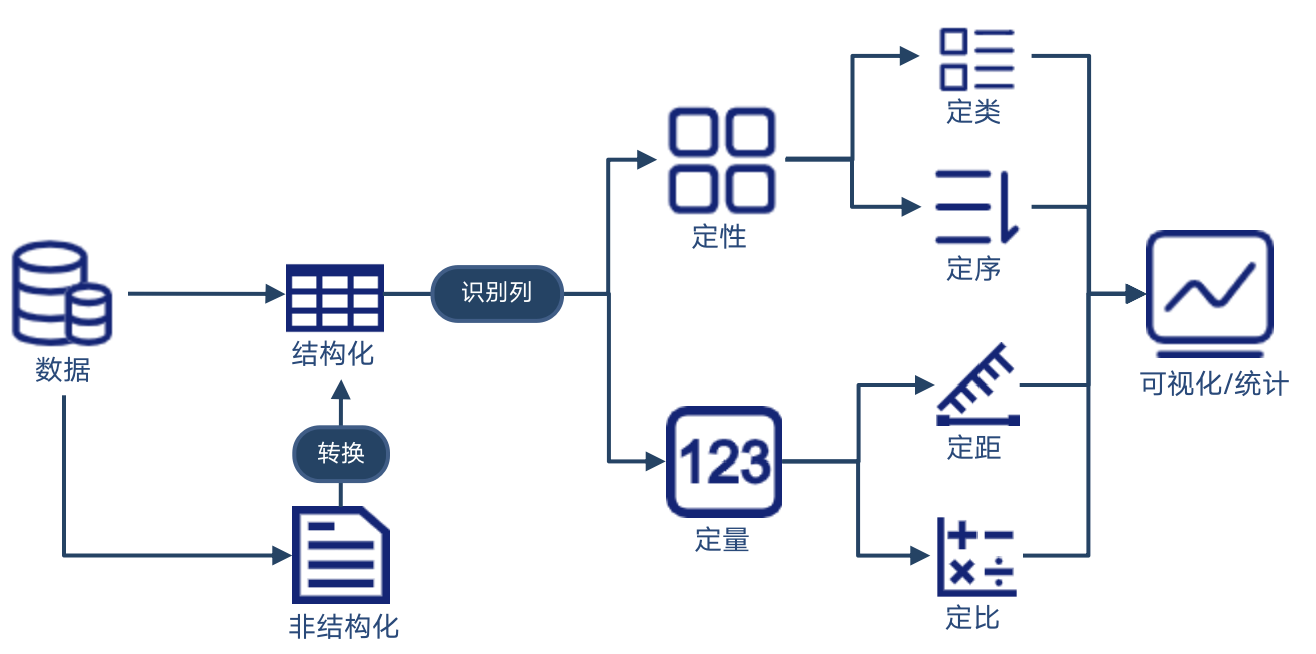